In [130]:
import sys
#!{sys.executable} -m pip install geopy
#!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install folium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 2.6 MB/s eta 0:00:00


In [119]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [41]:
lacTable = soup.find_all("table")

In [50]:
tables_list = pd.read_html("https://meteonews.ch/fr/Article/Lakes/CH/en") # request tables from example page
type(tables_list)

list

In [147]:
tables_list2 = pd.read_html("https://m.sihf.ch/fr/game-center/national-league#/results/date/asc/page/1/2023/all/14.09.2022-27.04.2023/all/103138/all")

ImportError: html5lib not found, please install it

In [51]:
lake = tables_list[0]
lake

,Lake,water temperature,water gauge
0,Ägerisee,24 °C,723.58 m
1,Alpnachersee,24 °C,NaN
2,Baldeggersee,26 °C,NaN
3,Burgäschisee,26 °C,NaN
4,Greifensee,26 °C,435.01 m
5,Katzensee,27 °C,NaN
6,Lac de Joux,21 °C,1003.62 m
7,Lake Biel,25 °C,429.39 m
8,Lake Brienz,23 °C,564.24 m
9,Lake Constance,25 °C,NaN


In [82]:
lake['temperature'] = lake['water temperature'].str.split(expand=True)[0].astype(int)
lake['elevation'] = lake['water gauge'].str.split(expand=True)[0].astype(float)

In [83]:
lake

,Lake,water temperature,water gauge,temperature,latitude,longitude,elevation
0,Ägerisee,24 °C,723.58 m,24,47.120049,8.621249,723.58
1,Alpnachersee,24 °C,NaN,24,46.962209,8.308075,NaN
2,Baldeggersee,26 °C,NaN,26,47.197507,8.261153,NaN
3,Burgäschisee,26 °C,NaN,26,47.169615,7.668129,NaN
4,Greifensee,26 °C,435.01 m,26,47.347328,8.679268,435.01
5,Katzensee,27 °C,NaN,27,47.252926,9.079065,NaN
6,Lac de Joux,21 °C,1003.62 m,21,46.640161,6.290169,1003.62
7,Lake Biel,25 °C,429.39 m,25,NaN,NaN,429.39
8,Lake Brienz,23 °C,564.24 m,23,46.723148,7.964303,564.24
9,Lake Constance,25 °C,NaN,25,47.416843,9.438921,NaN


In [67]:
geolocator = Nominatim(user_agent="lake_coordinates")

# Function to retrieve coordinates
def get_coordinates(location_name):
    location = geolocator.geocode(location_name + ", Switzerland")
    if location:
        return location.latitude, location.longitude
    return None, None

# Apply the function to the DataFrame
lake['latitude'], lake['longitude'] = zip(*lake['Lake'].apply(get_coordinates))

# Display the resulting DataFrame
#print(lake)

               Lake water temperature water gauge temperature   latitude  \
0          Ägerisee             24 °C    723.58 m          24  47.120049   
1      Alpnachersee             24 °C         NaN          24  46.962209   
2      Baldeggersee             26 °C         NaN          26  47.197507   
3      Burgäschisee             26 °C         NaN          26  47.169615   
4        Greifensee             26 °C    435.01 m          26  47.347328   
5         Katzensee             27 °C         NaN          27  47.252926   
6       Lac de Joux             21 °C   1003.62 m          21  46.640161   
7         Lake Biel             25 °C    429.39 m          25        NaN   
8       Lake Brienz             23 °C    564.24 m          23  46.723148   
9    Lake Constance             25 °C         NaN          25  47.416843   
10     Lake Hallwil             25 °C    448.51 m          25  47.282399   
11       Lake Leman             25 °C         NaN          25  46.507045   
12      Lake

In [80]:
type(lake["temperature"][0])

str

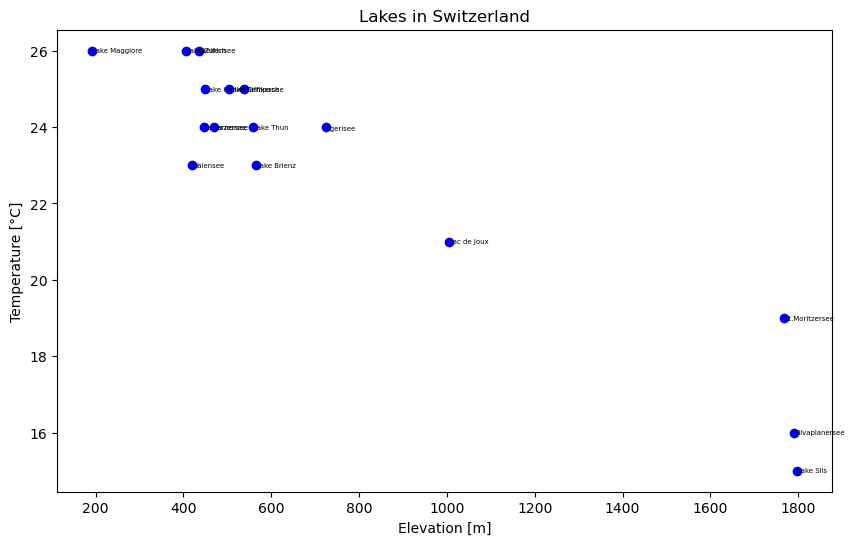

In [94]:
lake_cleaned = lake.dropna()

plt.figure(figsize=(10, 6))
plt.scatter(lake_cleaned['elevation'], lake_cleaned['temperature'], marker='o', color='blue')


# Add labels next to each point
for i, row in lake_cleaned.iterrows():
    plt.text(row['elevation'] + 0.1, row['temperature'], row['Lake'], fontsize=5, ha='left', va='center')

# Set plot labels and title
plt.xlabel('Elevation [m]')
plt.ylabel('Temperature [°C]')
plt.title('Lakes in Switzerland')

# Show the plot
plt.show()

In [144]:
# Load the Switzerland shapefile
switzerland = gpd.read_file('data/CHE_adm3.shp')

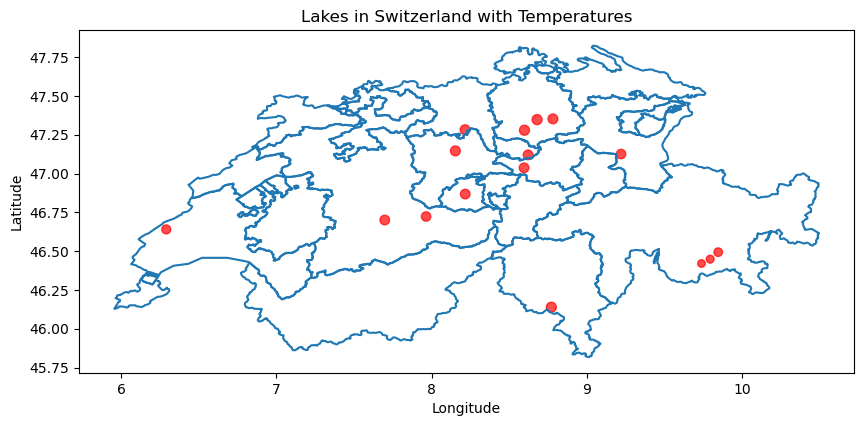

In [118]:

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(lake_cleaned['longitude'], lake_cleaned['latitude'])
gdf = gpd.GeoDataFrame(lake_cleaned, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
switzerland.boundary.plot(ax=ax)
gdf.plot(ax=ax, markersize=lake_cleaned['temperature'] * 2, color='red', alpha=0.7)

# Adding labels
#for idx, row in gdf.iterrows():
#    plt.text(row['longitude'] + 0.02, row['latitude'], row['Lake'], fontsize=10, ha='left', va='center')

plt.title("Lakes in Switzerland with Temperatures")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


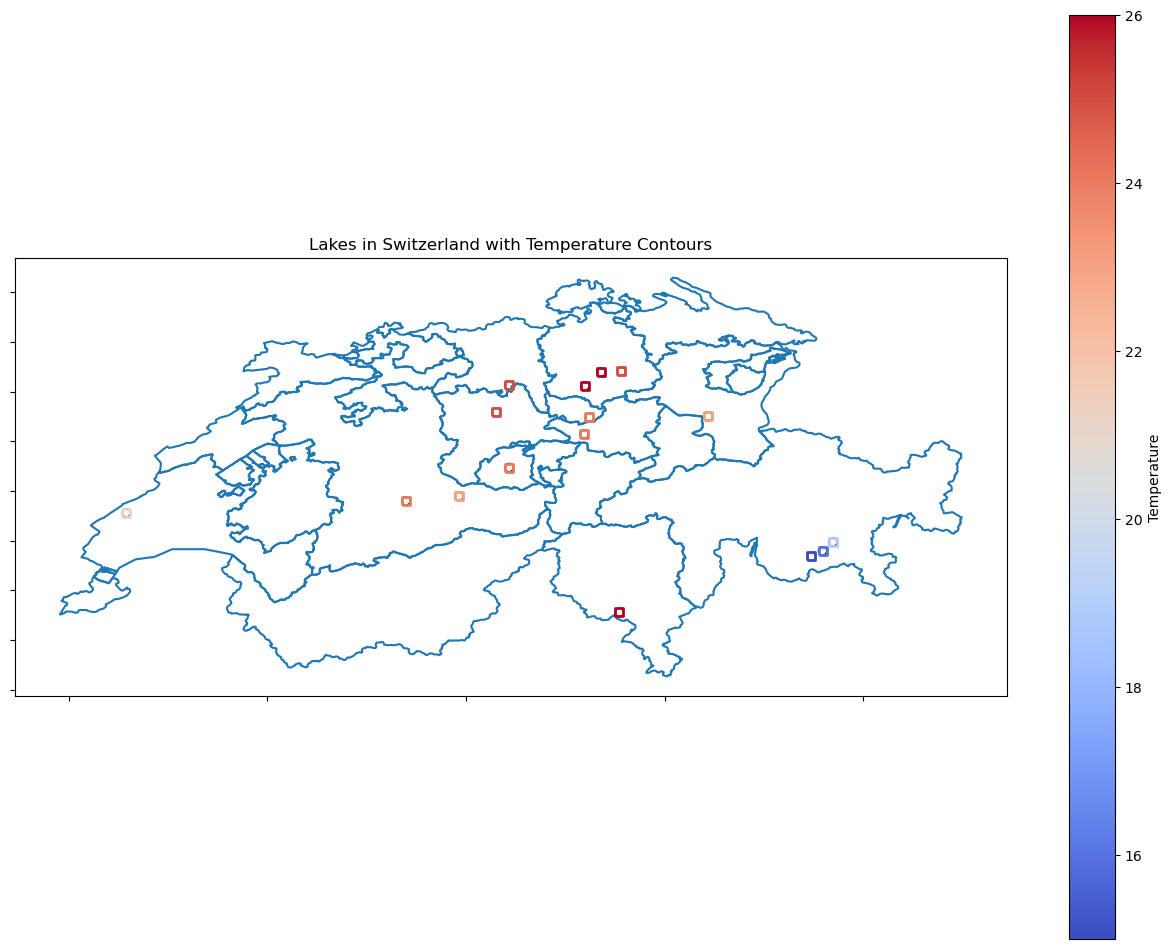

In [126]:
# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(lake_cleaned['longitude'], lake_cleaned['latitude'])
gdf = gpd.GeoDataFrame(lake_cleaned, geometry=geometry)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 12))

# Plotting the Switzerland boundaries
switzerland.boundary.plot(ax=ax)

# Create a color gradient based on the temperature values
norm = Normalize(vmin=lake_cleaned['temperature'].min(), vmax=lake_cleaned['temperature'].max())
cmap = plt.get_cmap('coolwarm')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Plotting the lake polygons with color gradient
gdf.plot(ax=ax, color='none', edgecolor='black')
for idx, row in gdf.iterrows():
    color = cmap(norm(row['temperature']))
    # Convert LineString to Polygon and plot the boundary
    boundary_polygon = row['geometry'].buffer(0.02).envelope.boundary
    gpd.GeoSeries(boundary_polygon).plot(ax=ax, color=color, linewidth=2)

# Adding color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Temperature')

plt.title("Lakes in Switzerland with Temperature Contours")
#plt.xlabel("Longitude")
#plt.ylabel("Latitude")

# Remove tick labels on both axes
ax.set_xticklabels([])
ax.set_yticklabels([])


plt.show()

In [145]:
# Load the lakes dataset (replace 'lakes.shp' with your actual file)
gdf = switzerland

In [131]:
import folium

In [146]:
# Calculate the center based on the GeoDataFrame's geometry bounds
center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]

# Create a map
m = folium.Map(location=center, zoom_start=10)

# Add GeoJSON features from the GeoDataFrame
folium.GeoJson(gdf).add_to(m)

# Show the map
m.save("interactive_map.html")  # Save the map as an HTML file

/var/folders/2n/hcnm2b7x4ms7q2k734nx80p80000gn/T/ipykernel_3782/3048918433.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
